## Generate weekly statistics (mean, median, mode) for number of new deaths across a specific state.


In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
#I have selected the Albama State
selected_state = "AL"
#Readind the deaths data
deaths = pd.read_csv("../data/covid_deaths_usafacts.csv")
deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-01-07,2023-01-08,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-14,2023-01-15,2023-01-16
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,230,230,230,230,230,230,230,230,230,230
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,719,719,719,719,719,721,721,721,721,721
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,108


In [3]:
# using the melt function so that we get the all the dates in one column and merging will be easy with enrichment data.
deaths_transpose = pd.melt(frame= deaths, id_vars=('countyFIPS','County Name','State','StateFIPS'), var_name=["Date"], value_name='Number of Deaths')
deaths_transpose = deaths_transpose[deaths_transpose['countyFIPS'] != 0]
deaths_transpose.head()

,countyFIPS,County Name,State,StateFIPS,Date,Number of Deaths
1,1001,Autauga County,AL,1,2020-01-22,0
2,1003,Baldwin County,AL,1,2020-01-22,0
3,1005,Barbour County,AL,1,2020-01-22,0
4,1007,Bibb County,AL,1,2020-01-22,0
5,1009,Blount County,AL,1,2020-01-22,0


In [4]:
deaths_selected_state = deaths_transpose[deaths_transpose["State"] == selected_state]
deaths_selected_state.head()

,countyFIPS,County Name,State,StateFIPS,Date,Number of Deaths
1,1001,Autauga County,AL,1,2020-01-22,0
2,1003,Baldwin County,AL,1,2020-01-22,0
3,1005,Barbour County,AL,1,2020-01-22,0
4,1007,Bibb County,AL,1,2020-01-22,0
5,1009,Blount County,AL,1,2020-01-22,0


In [5]:
#For the selected state Albama summing the deaths per day of all the counties.
deaths_selected_state_daily = deaths_selected_state.groupby('Date')['Number of Deaths'].sum()
deaths_selected_state_daily.head()

Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Number of Deaths, dtype: int64

In [6]:
#Finding out the new deaths per day.
new_deaths_selected_state_daily = deaths_selected_state_daily.diff().reset_index()
new_deaths_selected_state_daily.head()

,Date,Number of Deaths
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


In [7]:
#Converting the daily to weekly analysis and finding the mean weekly.
weekly_deaths_mean_selected_state = new_deaths_selected_state_daily.copy()
weekly_deaths_mean_selected_state['Date'] = pd.to_datetime(weekly_deaths_mean_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_mean_selected_state = weekly_deaths_mean_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].mean()
weekly_deaths_mean_selected_state = weekly_deaths_mean_selected_state.reset_index()
weekly_deaths_mean_selected_state.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [8]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_mean_selected_state_given_range = weekly_deaths_mean_selected_state[(weekly_deaths_mean_selected_state["Date"] >= '2022-05-29') & (weekly_deaths_mean_selected_state["Date"] <= '2023-01-02')]
weekly_deaths_mean_selected_state_given_range = weekly_deaths_mean_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_mean_selected_state_given_range['Date'] = weekly_deaths_mean_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_mean_selected_state_given_range

,Date,Number of Deaths
0,2022-05-30,1.857143
1,2022-06-06,4.000000
2,2022-06-13,0.571429
3,2022-06-20,4.714286
4,2022-06-27,4.285714
5,2022-07-04,3.857143
6,2022-07-11,5.142857
7,2022-07-18,7.142857
8,2022-07-25,2.714286
9,2022-08-01,11.857143


<AxesSubplot: title={'center': 'Mean of Weekly Albama Deaths'}, xlabel='Date'>

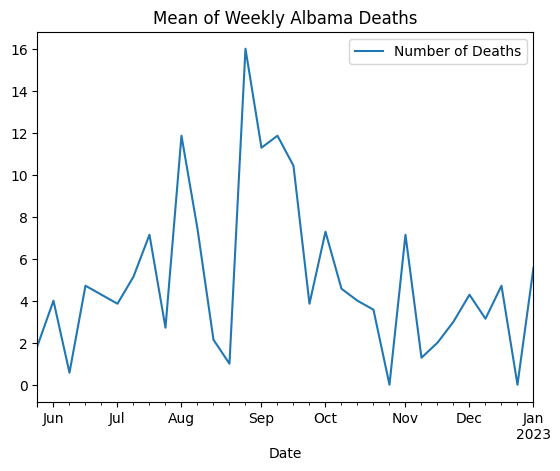

In [9]:
#Plotting the mean graph
weekly_deaths_mean_selected_state_given_range.plot(x='Date', y='Number of Deaths', title = 'Mean of Weekly Albama Deaths')

In [10]:
#Converting the daily to weekly analysis and finding the median weekly.
weekly_deaths_median_selected_state = new_deaths_selected_state_daily.copy()
weekly_deaths_median_selected_state['Date'] = pd.to_datetime(weekly_deaths_median_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_median_selected_state = weekly_deaths_median_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].median()
weekly_deaths_median_selected_state = weekly_deaths_median_selected_state.reset_index()
weekly_deaths_median_selected_state.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [11]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_median_selected_state_given_range = weekly_deaths_median_selected_state[(weekly_deaths_median_selected_state["Date"] >= '2022-05-29') & (weekly_deaths_median_selected_state["Date"] <= '2023-01-02')]
weekly_deaths_median_selected_state_given_range = weekly_deaths_median_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_median_selected_state_given_range['Date'] = weekly_deaths_median_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_median_selected_state_given_range

,Date,Number of Deaths
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,0.0
3,2022-06-20,1.0
4,2022-06-27,4.0
5,2022-07-04,0.0
6,2022-07-11,8.0
7,2022-07-18,7.0
8,2022-07-25,1.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Median of Weekly Albama Deaths'}, xlabel='Date'>

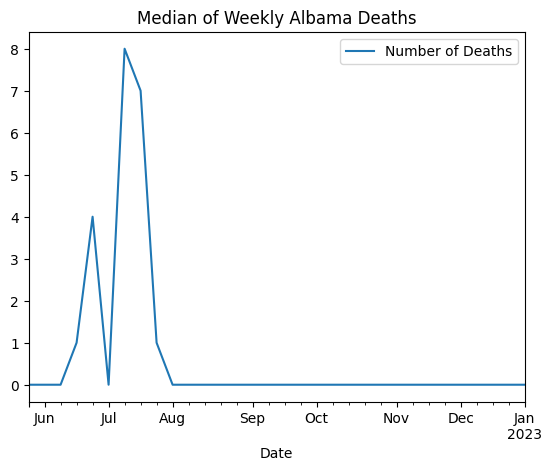

In [12]:
#Plotting the median graph
weekly_deaths_median_selected_state_given_range.plot(x='Date', y='Number of Deaths', title = 'Median of Weekly Albama Deaths')

In [13]:
#Converting the daily to weekly analysis and finding the mode weekly.
weekly_deaths_mode_selected_state = new_deaths_selected_state_daily.copy()
weekly_deaths_mode_selected_state['Date'] = pd.to_datetime(weekly_deaths_mode_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_mode_selected_state = weekly_deaths_mode_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].apply(statistics.mode)
weekly_deaths_mode_selected_state = weekly_deaths_mode_selected_state.reset_index()
weekly_deaths_mode_selected_state.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [14]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_mode_selected_state_given_range = weekly_deaths_mode_selected_state[(weekly_deaths_mode_selected_state["Date"] >= '2022-05-29') & (weekly_deaths_mode_selected_state["Date"] <= '2023-01-02')]
weekly_deaths_mode_selected_state_given_range = weekly_deaths_mode_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_mode_selected_state_given_range['Date'] = weekly_deaths_mode_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_mode_selected_state_given_range

,Date,Number of Deaths
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,0.0
3,2022-06-20,0.0
4,2022-06-27,5.0
5,2022-07-04,0.0
6,2022-07-11,9.0
7,2022-07-18,0.0
8,2022-07-25,1.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Mode of Weekly Albama Deaths'}, xlabel='Date'>

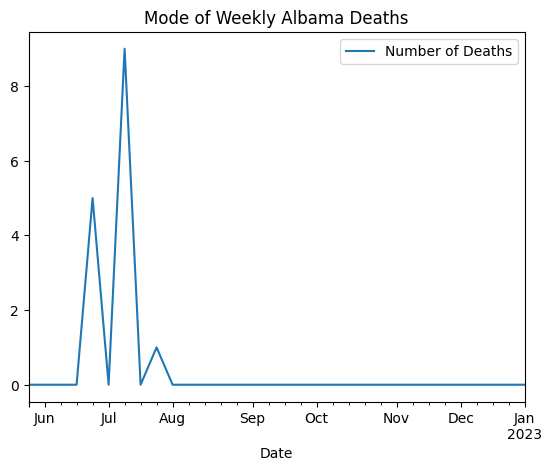

In [15]:
#Plottinf the mode graph
weekly_deaths_mode_selected_state_given_range.plot(x='Date', y='Number of Deaths', title = 'Mode of Weekly Albama Deaths')

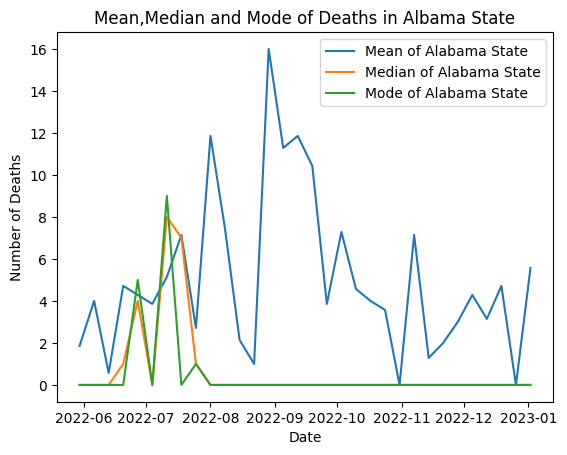

In [16]:
#plotting the mean,median and mode graphs.
plt.plot(weekly_deaths_mean_selected_state_given_range['Date'], weekly_deaths_mean_selected_state_given_range['Number of Deaths'], label='Mean of Alabama State')
plt.plot(weekly_deaths_median_selected_state_given_range['Date'], weekly_deaths_median_selected_state_given_range['Number of Deaths'], label='Median of Alabama State')
plt.plot(weekly_deaths_mode_selected_state_given_range['Date'], weekly_deaths_mode_selected_state_given_range['Number of Deaths'], label='Mode of Alabama State')
plt.title('Mean,Median and Mode of Deaths in Albama State')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()